In [1]:
#Base libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy
import glob
import fnmatch
import pandas as pd

from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

#Configuring relative file locations
homeDir = os.path.abspath("")
srcDir = os.path.join(homeDir,"src")
plotDir = os.path.join(homeDir,"plots")
dataDir = os.path.join(homeDir,"data")

# Load cell data for p45 and p70 actuator discs

## Introduction

Disc p45 is the actuator disc with 45\% porosity. Disc p70 is the actuator disc with 70\% porosity. Both discs are 20 cm in diameter. The mounting point of the disc is located 5cm off the disc centre.

![](/home/ksripathy/phd/surgingDisc/loadCell/surge_2024_m-tunn_ojf_nb_media/actuatorDiscs.png)
*Left: p45, Right: p70*

For the m-tunnel test, the test section size is 40 x 40 cm. For the ojf test, the test section is 3 x 3 m. Blockage effect correction has not been applied to the m-tunnel data. Freesteam density and  velocity recorded using tunnel pitot probe has been utilized for calculating C_T. The freestrema velocity readings for OJF runs are corrected using the anemometre measurements.

In the m-tunnel test, the disc is attached to the sliding platform of the plunging mechanism at its bottom. The presence of the plunging mechanism structure could have an influence on the load readings of m-tunnel tests. In contrast, the ojf test has teh disc mounted sidewards from the x-95 beam at a sufficiently far distance.

![](/home/ksripathy/phd/surgingDisc/loadCell/surge_2024_m-tunn_ojf_nb_media/mtunn_setup.png)
*M-tunnel test setup side view*

![](/home/ksripathy/phd/surgingDisc/loadCell/surge_2024_m-tunn_ojf_nb_media/ojf_setup.png)
*OJF test setup front view schematic*

## Importing load cell data


In [2]:
# load cell data

mtunn_p45_load_files = sorted(glob.glob(dataDir + "/loadCellFlipTest/2N/curved/p45LoadRPM*"))
mtunn_p45_log_files = sorted(glob.glob(dataDir + "/loadCellFlipTest/2N/curved/p45LogRPM*"))

mtunn_p45_load_arr = [np.mean(np.loadtxt(f)[:,1]) for f in mtunn_p45_load_files]
mtunn_p45_rho_inf_arr, mtunn_p45_vinf_arr = [np.loadtxt(f)[-4] for f in mtunn_p45_log_files], [np.loadtxt(f)[-2] for f in mtunn_p45_log_files]

mtunn_p70_load_files = sorted(glob.glob(dataDir + "/loadCellFlipTest/2N/curved/p70LoadRPM*"))
mtunn_p70_log_files = sorted(glob.glob(dataDir + "/loadCellFlipTest/2N/curved/p70LogRPM*"))

mtunn_p70_load_arr = [np.mean(np.loadtxt(f)[:,1]) for f in mtunn_p70_load_files]
mtunn_p70_rho_inf_arr, mtunn_p70_vinf_arr = [np.loadtxt(f)[-4] for f in mtunn_p70_log_files], [np.loadtxt(f)[-2] for f in mtunn_p70_log_files]

ojf_p45_load_files = sorted(glob.glob(dataDir + "/ojf2024/p45Vinf*"))[1:]
ojf_p45_load_arr = [np.mean(np.loadtxt(f)[:,0]) for f in ojf_p45_load_files]

ojf_p70_load_files = sorted(glob.glob(dataDir + "/ojf2024/p70Vinf*"))[1:]
ojf_p70_load_arr = [np.mean(np.loadtxt(f)[:,0]) for f in ojf_p70_load_files]

# ojf anemometer data
ojf_anmtr_data = np.loadtxt(dataDir + "/ojf2024/velOJFAnn.txt")
ojf_anmtr_data_sort = ojf_anmtr_data[ojf_anmtr_data[:,0].argsort()]
ojf_anmtr_corr_poly = np.poly1d(np.polyfit(ojf_anmtr_data_sort[:,0],ojf_anmtr_data_sort[:,1],1))

ojf_df = pd.read_csv(dataDir + "/ojf2024/ojfData.csv", header=None)
ojf_p45_rho_inf_arr, ojf_p45_vinf_arr = ojf_df[ojf_df[0] == 45].values[:,-1], ojf_anmtr_corr_poly(ojf_df[ojf_df[0] == 45].values[:,-2])
ojf_p70_rho_inf_arr, ojf_p70_vinf_arr = ojf_df[ojf_df[0] == 70].values[:,-1], ojf_anmtr_corr_poly(ojf_df[ojf_df[0] == 70].values[:,-2])

## Load cell data plots

PIV measurements in the w-tunnel were performed at freestream velocity 3 (case06) and 2 (case07) ms^{-1}. Load cell measurentsin the OJF and m-tunnel tests were measured for a range of velocities. In the plots, the load cell data for the discs from multiple campaigns are plotted. The vertical lines refer to the velocities at which piv tests were performed. 

0.839 0.763
0.87 0.828
0.461 0.447
0.528 0.495


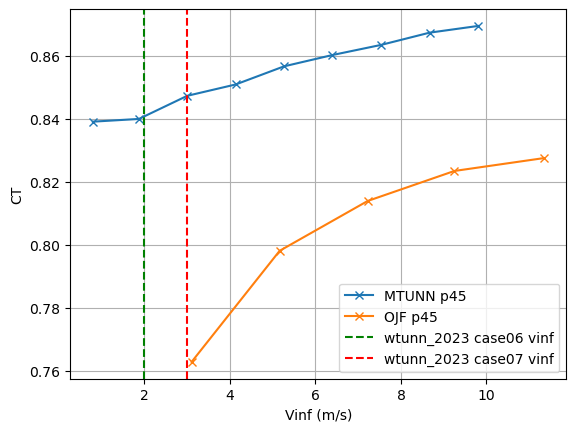

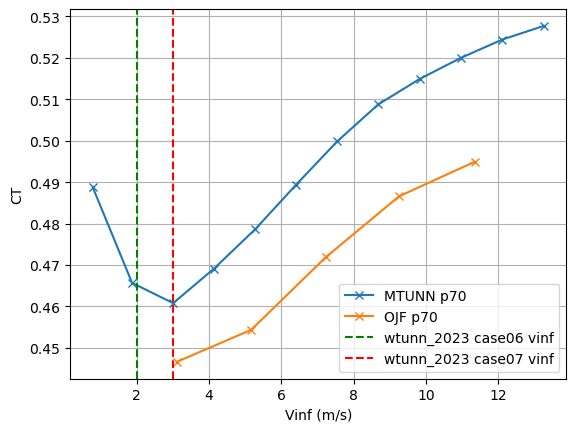

In [5]:
# Plot CT vs vinf

mtunn_p45_ct_arr = np.array(mtunn_p45_load_arr) / (0.5 * np.array(mtunn_p45_rho_inf_arr) * np.array(mtunn_p45_vinf_arr)**2 * np.pi * 0.1**2)
mtunn_p70_ct_arr = np.array(mtunn_p70_load_arr) / (0.5 * np.array(mtunn_p70_rho_inf_arr) * np.array(mtunn_p70_vinf_arr)**2 * np.pi * 0.1**2)
ojf_p45_ct_arr = np.array(ojf_p45_load_arr) / (0.5 * np.array(ojf_p45_rho_inf_arr) * np.array(ojf_p45_vinf_arr)**2 * np.pi * 0.1**2)
ojf_p70_ct_arr = np.array(ojf_p70_load_arr) / (0.5 * np.array(ojf_p70_rho_inf_arr) * np.array(ojf_p70_vinf_arr)**2 * np.pi * 0.1**2)

plt.figure()
plt.plot(mtunn_p45_vinf_arr, mtunn_p45_ct_arr, '-x', label='MTUNN p45')
plt.plot(ojf_p45_vinf_arr, ojf_p45_ct_arr, '-x', label='OJF p45')
plt.axvline(2,color="g",linestyle="--",label="wtunn_2023 case06 vinf")
plt.axvline(3,color="r",linestyle="--",label="wtunn_2023 case07 vinf")
plt.xlabel('Vinf (m/s)')
plt.ylabel('CT')
plt.legend()
plt.grid()

plt.figure()
plt.plot(mtunn_p70_vinf_arr, mtunn_p70_ct_arr, '-x', label='MTUNN p70')
plt.plot(ojf_p70_vinf_arr, ojf_p70_ct_arr, '-x', label='OJF p70')
plt.axvline(2,color="g",linestyle="--",label="wtunn_2023 case06 vinf")
plt.axvline(3,color="r",linestyle="--",label="wtunn_2023 case07 vinf")
plt.xlabel('Vinf (m/s)')
plt.ylabel('CT')
plt.legend()
plt.grid()

print(min(mtunn_p45_ct_arr.round(3)), min(ojf_p45_ct_arr.round(3)))
print(max(mtunn_p45_ct_arr.round(3)), max(ojf_p45_ct_arr.round(3)))
print(min(mtunn_p70_ct_arr.round(3)), min(ojf_p70_ct_arr.round(3)))
print(max(mtunn_p70_ct_arr.round(3)), max(ojf_p70_ct_arr.round(3)))